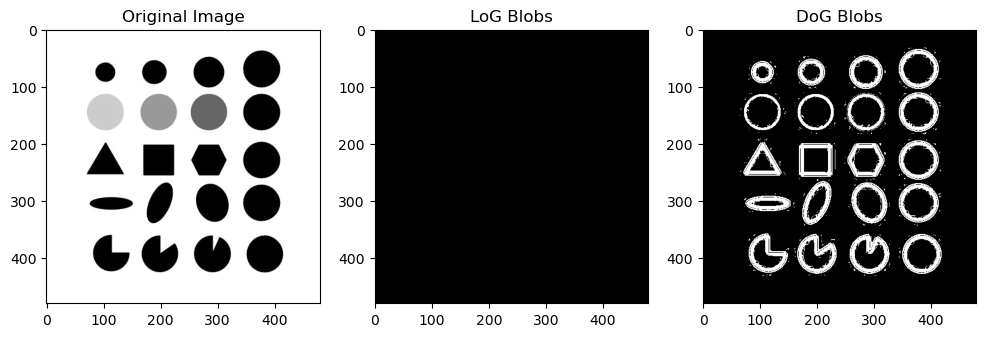

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

# Load the image
image = cv2.imread('blob.jpg', cv2.IMREAD_GRAYSCALE)

# --- Laplacian of Gaussian (LoG) ---
# Apply Gaussian filter
sigma = 2  # Standard deviation for Gaussian filter
log_response = gaussian_laplace(image, sigma=sigma)

# Find blobs: Detect zero crossings
log_blobs = (log_response < -0.03)  # Threshold for negative peaks

# --- Difference of Gaussian (DoG) ---
# Apply Gaussian filters with two different sigmas
sigma1 = 1
sigma2 = 2
gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)
gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)

dog_response = gaussian1 - gaussian2
dog_blobs = (dog_response > 20)  # Threshold for positive peaks

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("LoG Blobs")
plt.imshow(log_blobs, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("DoG Blobs")
plt.imshow(dog_blobs, cmap='gray')

plt.show()
